In [16]:
import pandas as pd 

In [57]:
inputfile = 'data/3_clean_zomato_gof_ori_1000_train.csv'
outputfile = 'data/3_clean_zomato_gof_ori_1000_sampling_train.csv'

In [58]:
df = pd.read_csv(inputfile)
df = df[df['rating']>0]

In [59]:
df.head()

,index,url,rest_price_idr,review,lat,long,is_chain,alcohol,delivery,entertainment,...,d_1000_park,d_1000_restaurant,d_1000_school,d_1000_store,d_1000_supermarket,d_1000_train_station,en_1000,n_compt_1000,avg_n_rest,rating
0,5122,https://www.zomato.com/jakarta/may-star-penjar...,300000,144.0,-6.127206,106.791299,1,1.0,0.0,1.0,...,10.0,30.0,34.0,31.0,15.0,0.0,2.381122,0.240741,3.676923,3.9
1,3004,https://www.zomato.com/jakarta/shigeru-pantai-...,100000,187.0,-6.109828,106.740279,1,0.0,1.0,0.0,...,9.0,95.0,41.0,78.0,6.0,0.0,2.132934,0.011364,4.000000,3.9
2,3838,https://www.zomato.com/jakarta/ruths-chris-ste...,1900000,569.0,-6.224840,106.824214,0,1.0,0.0,0.0,...,16.0,14.0,39.0,35.0,25.0,0.0,2.535210,0.000000,0.000000,4.6
3,3216,https://www.zomato.com/jakarta/holycow-steak-h...,400000,259.0,-6.244192,106.783964,1,0.0,0.0,0.0,...,25.0,24.0,56.0,32.0,40.0,3.0,2.438442,0.022222,3.350000,3.0
4,1509,https://www.zomato.com/jakarta/txoko-senopati/...,500000,172.0,-6.233866,106.812572,0,1.0,1.0,0.0,...,30.0,35.0,55.0,31.0,11.0,0.0,2.487848,0.006579,4.200000,4.5


<AxesSubplot:ylabel='Frequency'>

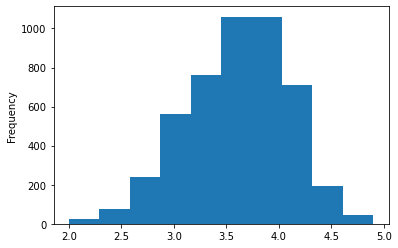

In [60]:
df['rating'].plot(kind='hist')

In [61]:
df_lower_1 = df[df['rating']<2.7]
df_lower_2 = df[(df['rating'] >= 2.7) & (df['rating'] < 3.3) ]
df_midd = df[ (df['rating'] >= 3.3) & (df['rating'] < 4.0) ] 
df_upp1 = df[ (df['rating'] >= 4.0) & (df['rating'] < 4.5) ] 
df_upp2 = df[ df['rating'] >= 4.5] 

In [62]:
df_lower_1.shape , df_lower_2.shape,  df_midd.shape, df_upp1.shape, df_upp2.shape 

((152, 68), (970, 68), (2319, 68), (1143, 68), (146, 68))

In [63]:
def sampling (df_input, sampling_row, iteration):
    result = []
    for i in range(iteration):
          result.append(df_input.sample(sampling_row))
    df_result = pd.concat(result)
    return df_result 

In [64]:
# lower 1 
df_lower1 = sampling(df_lower_1, 2, 900)

# lower 2
df_lower2 = sampling(df_lower_2, 2, 800)

# upper 1 
df_upper1 = sampling(df_upp1, 2, 700)

# upper 2 
df_upper2 = sampling(df_upp2, 2, 700)

In [65]:
df_result = pd.concat([df_lower1,df_lower2,df_midd,df_upper1,df_upper2])

In [66]:
df_result.shape

(8519, 68)

<AxesSubplot:ylabel='Frequency'>

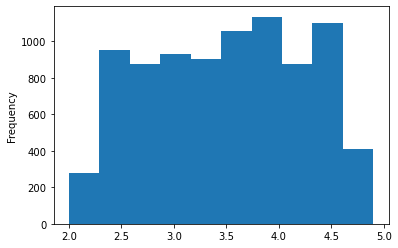

In [67]:
df_result['rating'].plot(kind='hist')

In [68]:
df_result.to_csv(outputfile)